In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dados_violencia_mulheres_ses_2022.csv", sep= ";", encoding="utf-8")

df.head(10)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,02/01/2022,11/01/1999,22,Feminino,Branca,Campestre,Residencia,Não,Não,Sim,Não,Não,Um,Feminino,Não se aplica,Não se aplica
1,18/01/2022,31/01/1978,43,Feminino,Parda,Timóteo,Residencia,Ignorado,Não,Sim,Não,Não,Um,Masculino,Ignorado,Ignorado
2,14/01/2022,07/02/1979,42,Feminino,Parda,Ipatinga,Ignorado,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Ignorado,Ignorado
3,26/01/2022,29/10/1984,37,Feminino,Branca,Catuji,Via pública,Sim,Não,Sim,Sim,Não,Um,Masculino,Heterossexual,Não se aplica
4,04/02/2022,02/05/1970,51,Feminino,Preta,Catuji,Outro,Não,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica
5,08/02/2022,19/11/2003,18,Feminino,Parda,Ipatinga,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
6,05/02/2022,14/08/1994,27,Feminino,Parda,Periquito,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Ignorado
7,28/02/2022,15/06/1969,52,Feminino,Preta,Iapu,Residencia,Sim,Não,Sim,Sim,Não,Um,Masculino,Ignorado,Ignorado
8,18/01/2022,08/07/2007,14,Feminino,Preta,Periquito,Residencia,Não,Não,Sim,Sim,Sim,Um,Feminino,Não se aplica,Não se aplica
9,03/03/2022,26/07/2016,5,Feminino,Parda,Santana do Paraíso,Residencia,Ignorado,Não,Sim,Não,Não,Dois ou mais,Masculino,Não se aplica,Não se aplica


In [4]:
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

print(df.info())

print(df.isnull().sum())

Linhas: 36629, Colunas: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36629 entries, 0 to 36628
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DT_NOTIFIC  36629 non-null  object
 1   DT_NASC     36305 non-null  object
 2   NU_IDADE_N  36629 non-null  int64 
 3   CS_SEXO     36629 non-null  object
 4   CS_RACA     36542 non-null  object
 5   ID_MN_RESI  36522 non-null  object
 6   LOCAL_OCOR  35502 non-null  object
 7   OUT_VEZES   35092 non-null  object
 8   LES_AUTOP   35285 non-null  object
 9   VIOL_FISIC  35517 non-null  object
 10  VIOL_PSICO  35510 non-null  object
 11  VIOL_SEXU   35508 non-null  object
 12  NUM_ENVOLV  34881 non-null  object
 13  AUTOR_SEXO  35404 non-null  object
 14  ORIENT_SEX  35519 non-null  object
 15  IDENT_GEN   35519 non-null  object
dtypes: int64(1), object(15)
memory usage: 4.5+ MB
None
DT_NOTIFIC       0
DT_NASC        324
NU_IDADE_N       0
CS_SEXO          0
CS_RACA     

In [5]:
df_trans = df[df["IDENT_GEN"].isin(["Transexual Mulher", "Transsexual Homem"])]
print(f"Quantidade de pessoas na comunidade trans no dataset: {df_trans.shape[0]}")

Quantidade de pessoas na comunidade trans no dataset: 37


In [6]:
df_trans = df[df["IDENT_GEN"].isin(["Transexual Mulher", "Transsexual Homem"])].copy()
df_trans.to_csv("mulheres_trans.csv", index=False)

In [7]:
print(df["AUTOR_SEXO"].unique())

['Feminino' 'Masculino' 'Ambos os sexos' 'Ignorado' nan]


In [8]:
df.replace("Ignorado", np.nan, inplace=True)

In [9]:
df["AUTOR_SEXO"].isnull().mean() * 100

np.float64(10.740123945507658)

In [10]:
percentual = (df["AUTOR_SEXO"].value_counts(dropna=False, normalize=True) * 100).round(2)
print(percentual)

AUTOR_SEXO
Masculino         44.64
Feminino          42.82
NaN               10.74
Ambos os sexos     1.80
Name: proportion, dtype: float64


In [11]:
df.groupby("ID_MN_RESI")["AUTOR_SEXO"].apply(lambda x: x.isnull().mean() * 100).sort_values(ascending=False)

ID_MN_RESI
Mercês             100.0
Maripá de Minas    100.0
José Raydan        100.0
Vieiras            100.0
Arantina           100.0
                   ...  
Toledo               0.0
Tocos do Moji        0.0
Tiros                0.0
Tapira               0.0
Alto Jequitibá       0.0
Name: AUTOR_SEXO, Length: 827, dtype: float64

In [12]:
df['AUTOR_SEXO_NULO'] = df['AUTOR_SEXO'].isna().astype(int)
proporcao_nulos_por_municipio = df.groupby('ID_MN_RESI')['AUTOR_SEXO_NULO'].mean()
print(proporcao_nulos_por_municipio.describe())

count    827.000000
mean       0.125292
std        0.198587
min        0.000000
25%        0.000000
50%        0.037500
75%        0.166667
max        1.000000
Name: AUTOR_SEXO_NULO, dtype: float64


In [13]:
# Calcular outliers
Q1 = proporcao_nulos_por_municipio.quantile(0.25)  # 0.000000
Q3 = proporcao_nulos_por_municipio.quantile(0.75)  # 0.166667
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR  # 0.416667

# Filtrar outliers
outliers = proporcao_nulos_por_municipio[proporcao_nulos_por_municipio > limite_superior]
print(f"Número de outliers: {len(outliers)}")
print(outliers.sort_values(ascending=False))

Número de outliers: 68
ID_MN_RESI
Arantina                1.000000
Maripá de Minas         1.000000
Desterro do Melo        1.000000
Chiador                 1.000000
Santana do Jacaré       1.000000
                          ...   
Governador Valadares    0.432574
Alto Caparaó            0.428571
Materlândia             0.428571
Heliodora               0.421053
Jequeri                 0.416667
Name: AUTOR_SEXO_NULO, Length: 68, dtype: float64


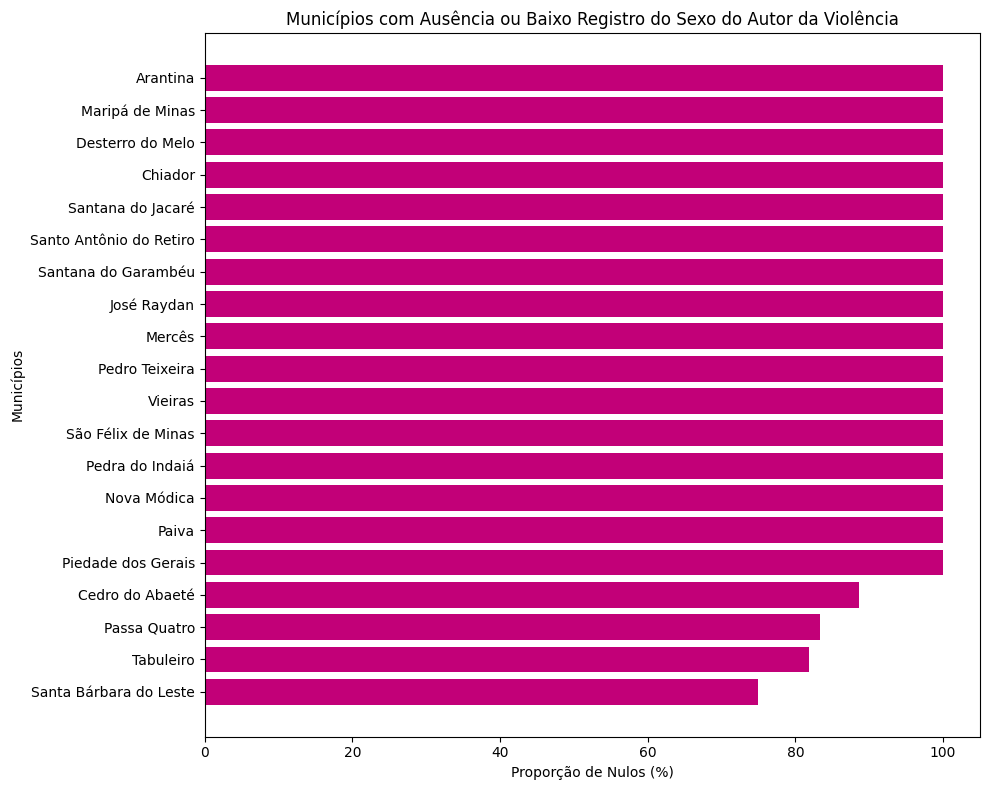

In [14]:
outliers_sorted = outliers.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(outliers_sorted.index, outliers_sorted.values * 100, color='#C20078')
plt.xlabel('Proporção de Nulos (%)')
plt.ylabel('Municípios')
plt.title('Municípios com Ausência ou Baixo Registro do Sexo do Autor da Violência')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
print(df["AUTOR_SEXO_NULO"].describe())

count    36629.000000
mean         0.107401
std          0.309627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: AUTOR_SEXO_NULO, dtype: float64


In [16]:
df['AUTOR_SEXO'] = df['AUTOR_SEXO'].fillna('Não informado')

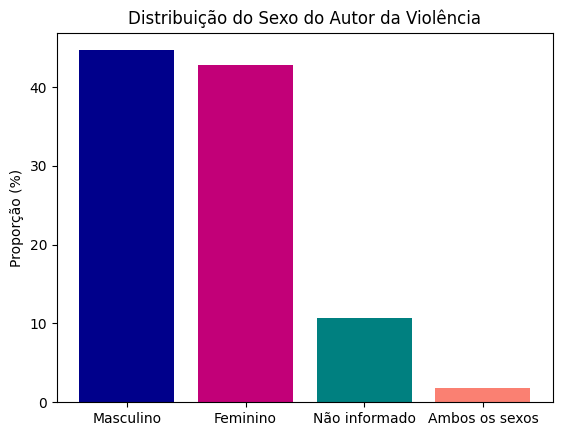

In [17]:
distribuicao = df['AUTOR_SEXO'].value_counts(normalize=True) * 100
plt.bar(distribuicao.index, distribuicao.values, color=['darkblue', '#C20078', '#008080', 'salmon'])
plt.ylabel('Proporção (%)')
plt.title('Distribuição do Sexo do Autor da Violência')
plt.show()

In [18]:
print(df["LOCAL_OCOR"].unique())

['Residencia' nan 'Via pública' 'Outro' 'Bar ou similar'
 'Comercio/Serviços' 'Habitação coletiva' 'Escola'
 'Local de pratica esportiva' 'Industria/Construção']


In [19]:
df["LOCAL_OCOR"].isnull().sum()

np.int64(4620)

In [20]:
df["LOCAL_OCOR"].isnull().mean()*100

np.float64(12.612956946681592)

In [21]:
percentual = (df["LOCAL_OCOR"].value_counts(dropna=False, normalize=True) * 100).round(2)
print(percentual)

LOCAL_OCOR
Residencia                    70.59
NaN                           12.61
Via pública                    8.09
Outro                          4.03
Bar ou similar                 1.71
Escola                         1.50
Comercio/Serviços              0.81
Habitação coletiva             0.41
Local de pratica esportiva     0.17
Industria/Construção           0.08
Name: proportion, dtype: float64


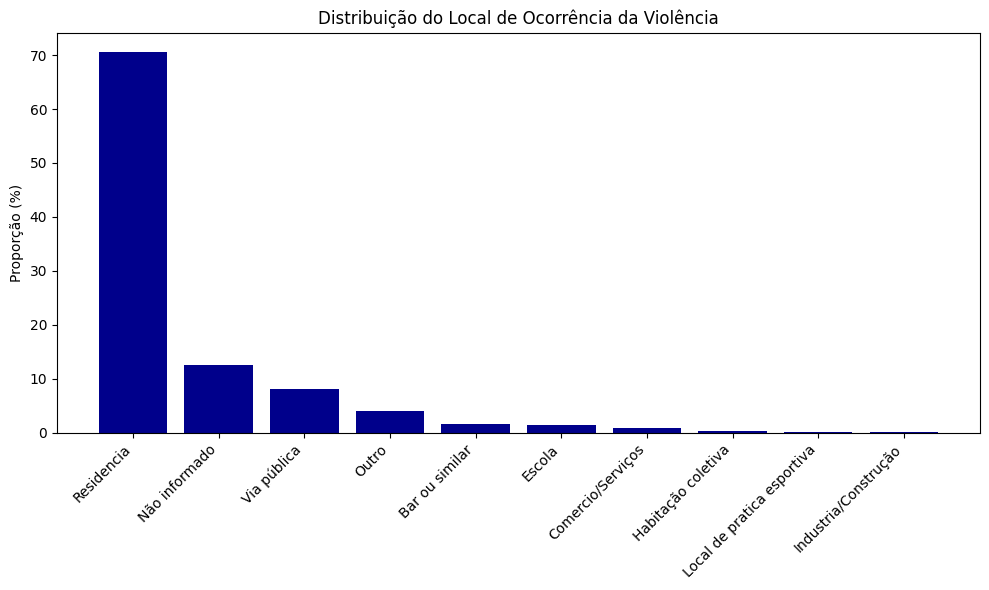

In [22]:
locais = {
    'Residencia': 70.59, 'Não informado': 12.61, 'Via pública': 8.09, 'Outro': 4.03,
    'Bar ou similar': 1.71, 'Escola': 1.50, 'Comercio/Serviços': 0.81,
    'Habitação coletiva': 0.41, 'Local de pratica esportiva': 0.17, 'Industria/Construção': 0.08
}

plt.figure(figsize=(10, 6))
plt.bar(locais.keys(), locais.values(), color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proporção (%)')
plt.title('Distribuição do Local de Ocorrência da Violência')
plt.tight_layout()
plt.show()

In [23]:
proporcao_nulos_local = df.groupby('ID_MN_RESI')['LOCAL_OCOR'].apply(lambda x: x.isna().mean()) * 100
Q1 = proporcao_nulos_local.quantile(0.25)
Q3 = proporcao_nulos_local.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_local = proporcao_nulos_local[proporcao_nulos_local > limite_superior]
print(f"Número de outliers em LOCAL_OCOR: {len(outliers_local)}")
print(outliers_local.sort_values(ascending=False))

Número de outliers em LOCAL_OCOR: 89
ID_MN_RESI
Arantina                100.000000
Frei Lagonegro          100.000000
Nova Módica             100.000000
José Raydan             100.000000
São Félix de Minas      100.000000
                           ...    
Betim                    28.972868
Inconfidentes            28.571429
Juramento                28.571429
São João do Manhuaçu     28.571429
Santana do Riacho        27.777778
Name: LOCAL_OCOR, Length: 89, dtype: float64


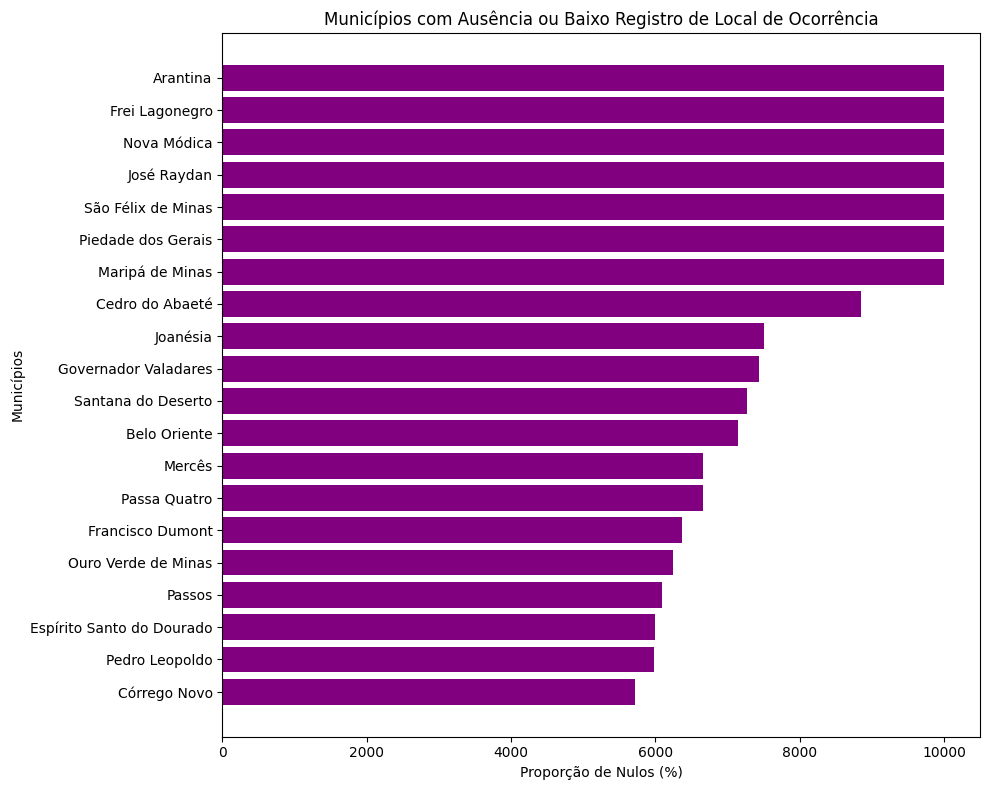

In [24]:
outliers_sorted_local = outliers_local.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(outliers_sorted_local.index, outliers_sorted_local.values * 100, color='purple')
plt.xlabel('Proporção de Nulos (%)')
plt.ylabel('Municípios')
plt.title('Municípios com Ausência ou Baixo Registro de Local de Ocorrência')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Valores únicos em NU_IDADE_N: [ 22  43  42  37  51  18  27  52  14   5   4  15  11  21  19  20  48  45
  62  33  23  24  28  29  41  25  34  49  26  31  16  12  39  30  54  13
  60  38  17  40  53  61  32  44  55  36  35  58  46  65  68   0   9  47
   1   3  67  56  57  50   7  69  59  66   8  10  84  64   2  63  71  78
  79  72   6  77  70  85  94  80  75  76  73  83  86  82  74  89 112  88
  81  91  90  92  93  87  98  95  96  97 101 121  99 106]

Estatísticas básicas:
count    36629.000000
mean        29.849764
std         15.866746
min          0.000000
25%         18.000000
50%         27.000000
75%         40.000000
max        121.000000
Name: NU_IDADE_N, dtype: float64


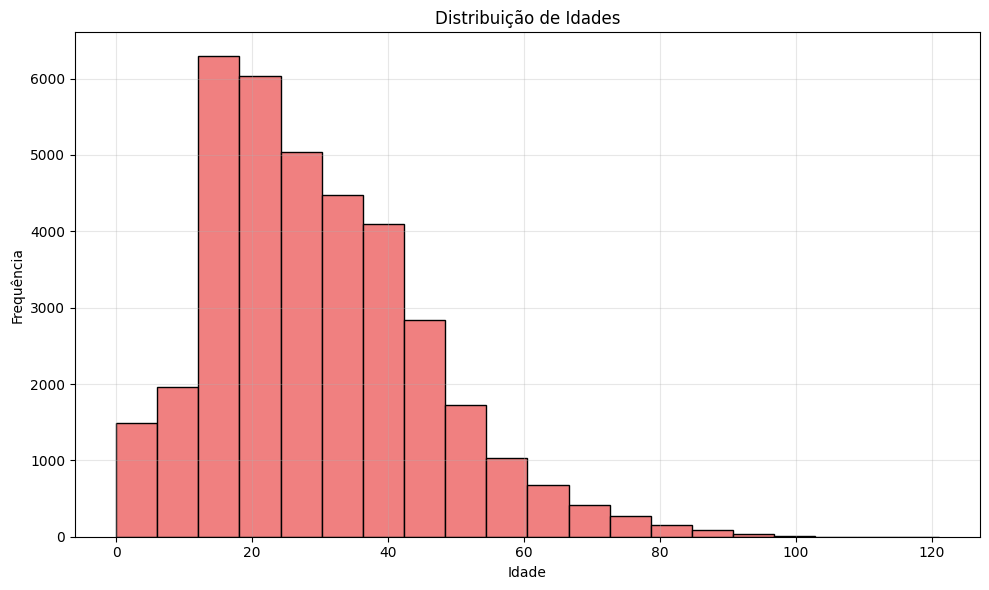

In [25]:
print("Valores únicos em NU_IDADE_N:", df['NU_IDADE_N'].unique())
print("\nEstatísticas básicas:")
print(df['NU_IDADE_N'].describe())

# Passo 3: Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['NU_IDADE_N'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [27]:
# Verificar valores únicos (para confirmar o formato)
print("Valores únicos em cada variável:")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    print(f"{col}: {df[col].unique()}")

# Calcular porcentagens incluindo NaN
print("\nPorcentagens (incluindo NaN):")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    proporcao = df[col].value_counts(dropna=False, normalize=True) * 100
    print(f"\n{col}:\n{proporcao.round(2)}")

# Calcular porcentagens apenas de Sim/Não (excluindo NaN)
print("\nPorcentagens apenas de Sim/Não (excluindo NaN):")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    # Filtrar apenas Sim e Não, ignorando NaN
    sem_nulos = df[col].dropna()
    proporcao_sem_nulos = sem_nulos.value_counts(normalize=True) * 100
    print(f"\n{col} (sem NaN):\n{proporcao_sem_nulos.round(2)}")

Valores únicos em cada variável:
VIOL_FISIC: ['Sim' 'Não' nan]
VIOL_PSICO: ['Não' 'Sim' nan]
VIOL_SEXU: ['Não' 'Sim' nan]

Porcentagens (incluindo NaN):

VIOL_FISIC:
VIOL_FISIC
Sim    65.94
Não    29.82
NaN     4.24
Name: proportion, dtype: float64

VIOL_PSICO:
VIOL_PSICO
Não    67.78
Sim    26.28
NaN     5.94
Name: proportion, dtype: float64

VIOL_SEXU:
VIOL_SEXU
Não    81.38
Sim    12.54
NaN     6.07
Name: proportion, dtype: float64

Porcentagens apenas de Sim/Não (excluindo NaN):

VIOL_FISIC (sem NaN):
VIOL_FISIC
Sim    68.86
Não    31.14
Name: proportion, dtype: float64

VIOL_PSICO (sem NaN):
VIOL_PSICO
Não    72.06
Sim    27.94
Name: proportion, dtype: float64

VIOL_SEXU (sem NaN):
VIOL_SEXU
Não    86.65
Sim    13.35
Name: proportion, dtype: float64


In [28]:
colunas = ['VIOL_SEXU', 'VIOL_PSICO', 'VIOL_FISIC']
for col in colunas:
    df[col] = df[col].fillna('Não informado')

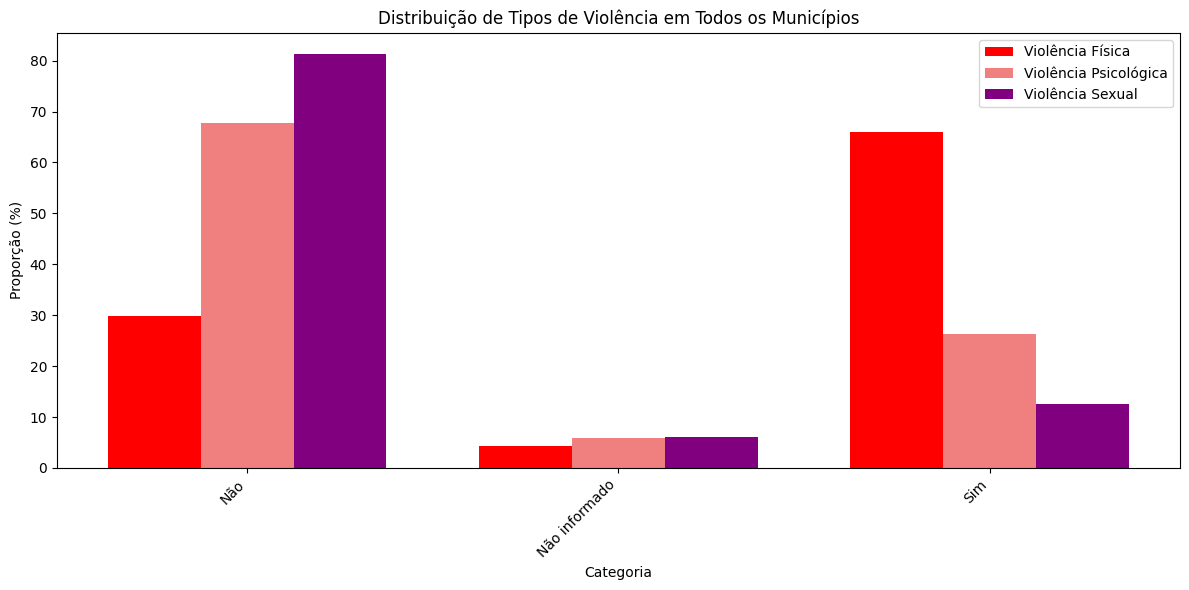

Distribuição em % para todos os municípios:
               VIOL_FISIC  VIOL_PSICO  VIOL_SEXU
Não                 29.82       67.78      81.38
Não informado        4.24        5.94       6.07
Sim                 65.94       26.28      12.54


In [30]:
distribuicao = pd.DataFrame({
    'VIOL_FISIC': df['VIOL_FISIC'].value_counts(normalize=True) * 100,
    'VIOL_PSICO': df['VIOL_PSICO'].value_counts(normalize=True) * 100,
    'VIOL_SEXU': df['VIOL_SEXU'].value_counts(normalize=True) * 100
}).fillna(0)  # Preenche com 0 se alguma categoria não existir

# Passo 4: Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25  # Largura das barras
index = range(len(distribuicao.index))  # Posições no eixo x

# Posições das barras
plt.bar([i - bar_width for i in index], distribuicao['VIOL_FISIC'], bar_width, label='Violência Física', color='red')
plt.bar(index, distribuicao['VIOL_PSICO'], bar_width, label='Violência Psicológica', color='lightcoral')
plt.bar([i + bar_width for i in index], distribuicao['VIOL_SEXU'], bar_width, label='Violência Sexual', color='purple')

# Configurações do gráfico
plt.xlabel('Categoria')
plt.ylabel('Proporção (%)')
plt.title('Distribuição de Tipos de Violência em Todos os Municípios')
plt.xticks(index, distribuicao.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Exibir os valores calculados
print("Distribuição em % para todos os municípios:")
print(distribuicao.round(2))

In [32]:
df_pessoas_trans = pd.read_csv('pessoas_trans.csv')  

print("Valores únicos em cada variável:")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    print(f"{col}: {df_pessoas_trans[col].unique()}")

print("\nPorcentagens (incluindo NaN):")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    proporcao = df_pessoas_trans[col].value_counts(dropna=False, normalize=True) * 100
    print(f"\n{col}:\n{proporcao.round(2)}")

print("\nPorcentagens apenas de Sim/Não (excluindo NaN):")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    sem_nulos = df_pessoas_trans[col].dropna()
    proporcao_sem_nulos = sem_nulos.value_counts(normalize=True) * 100
    print(f"\n{col} (sem NaN):\n{proporcao_sem_nulos.round(2)}")

Valores únicos em cada variável:
VIOL_FISIC: [1. 0.]
VIOL_PSICO: [0. 1.]
VIOL_SEXU: [0. 1.]

Porcentagens (incluindo NaN):

VIOL_FISIC:
VIOL_FISIC
1.0    70.27
0.0    29.73
Name: proportion, dtype: float64

VIOL_PSICO:
VIOL_PSICO
0.0    75.68
1.0    24.32
Name: proportion, dtype: float64

VIOL_SEXU:
VIOL_SEXU
0.0    89.19
1.0    10.81
Name: proportion, dtype: float64

Porcentagens apenas de Sim/Não (excluindo NaN):

VIOL_FISIC (sem NaN):
VIOL_FISIC
1.0    70.27
0.0    29.73
Name: proportion, dtype: float64

VIOL_PSICO (sem NaN):
VIOL_PSICO
0.0    75.68
1.0    24.32
Name: proportion, dtype: float64

VIOL_SEXU (sem NaN):
VIOL_SEXU
0.0    89.19
1.0    10.81
Name: proportion, dtype: float64


Valores únicos antes do ajuste:
VIOL_FISIC: ['Sim' 'Não']
VIOL_PSICO: ['Não' 'Sim']
VIOL_SEXU: ['Não' 'Sim']


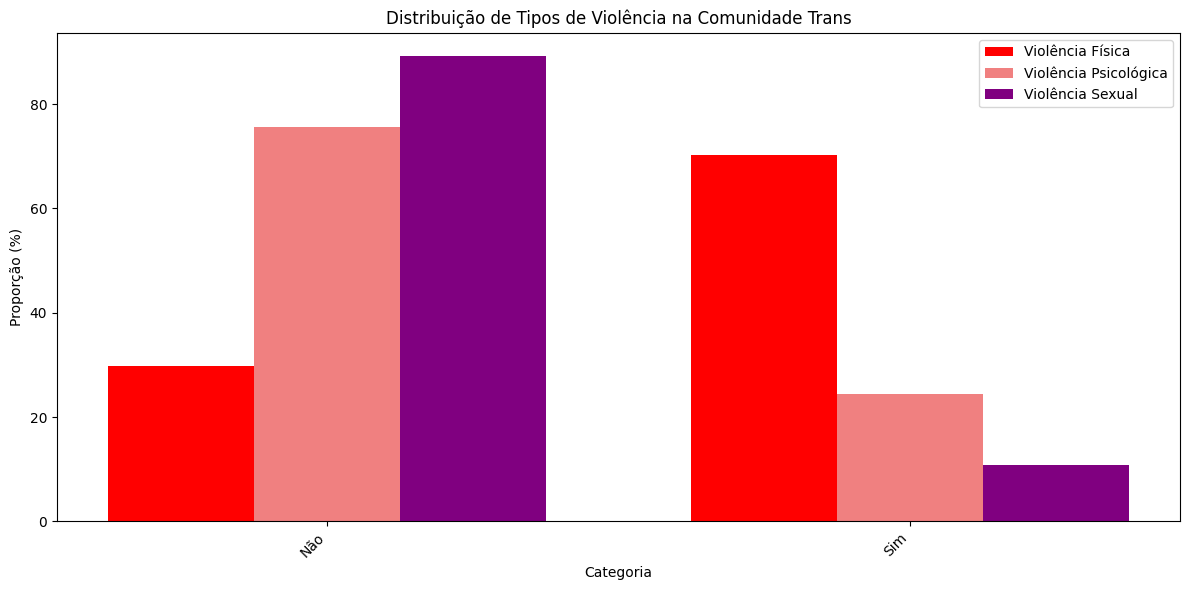

Distribuição em % na comunidade trans:
     VIOL_FISIC  VIOL_PSICO  VIOL_SEXU
Não       29.73       75.68      89.19
Sim       70.27       24.32      10.81


In [33]:
df_pessoas_trans = pd.read_csv('pessoas_trans.csv')  
print("Valores únicos antes do ajuste:")
for col in ['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']:
    print(f"{col}: {df_trans[col].unique()}")

distribuicao = pd.DataFrame({
    'VIOL_FISIC': df_trans['VIOL_FISIC'].value_counts(normalize=True) * 100,
    'VIOL_PSICO': df_trans['VIOL_PSICO'].value_counts(normalize=True) * 100,
    'VIOL_SEXU': df_trans['VIOL_SEXU'].value_counts(normalize=True) * 100
}).fillna(0)  # Preenche com 0 se uma categoria não existir


fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25  # Largura das barras
index = range(len(distribuicao.index))  # Posições no eixo x

# Posições das barras
plt.bar([i - bar_width for i in index], distribuicao['VIOL_FISIC'], bar_width, label='Violência Física', color='red')
plt.bar(index, distribuicao['VIOL_PSICO'], bar_width, label='Violência Psicológica', color='lightcoral')
plt.bar([i + bar_width for i in index], distribuicao['VIOL_SEXU'], bar_width, label='Violência Sexual', color='purple')

# Configurações do gráfico
plt.xlabel('Categoria')
plt.ylabel('Proporção (%)')
plt.title('Distribuição de Tipos de Violência na Comunidade Trans')
plt.xticks(index, distribuicao.index, rotation=45, ha='right') 
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Exibir os valores calculados
print("Distribuição em % na comunidade trans:")
print(distribuicao.round(2))

In [34]:
df.head(10)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN,AUTOR_SEXO_NULO
0,02/01/2022,11/01/1999,22,Feminino,Branca,Campestre,Residencia,Não,Não,Sim,Não,Não,Um,Feminino,Não se aplica,Não se aplica,0
1,18/01/2022,31/01/1978,43,Feminino,Parda,Timóteo,Residencia,NaN,Não,Sim,Não,Não,Um,Masculino,NaN,NaN,0
2,14/01/2022,07/02/1979,42,Feminino,Parda,Ipatinga,NaN,NaN,Sim,Sim,Não,Não,Um,Feminino,NaN,NaN,0
3,26/01/2022,29/10/1984,37,Feminino,Branca,Catuji,Via pública,Sim,Não,Sim,Sim,Não,Um,Masculino,Heterossexual,Não se aplica,0
4,04/02/2022,02/05/1970,51,Feminino,Preta,Catuji,Outro,Não,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica,0
5,08/02/2022,19/11/2003,18,Feminino,Parda,Ipatinga,Residencia,NaN,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica,0
6,05/02/2022,14/08/1994,27,Feminino,Parda,Periquito,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,NaN,0
7,28/02/2022,15/06/1969,52,Feminino,Preta,Iapu,Residencia,Sim,Não,Sim,Sim,Não,Um,Masculino,NaN,NaN,0
8,18/01/2022,08/07/2007,14,Feminino,Preta,Periquito,Residencia,Não,Não,Sim,Sim,Sim,Um,Feminino,Não se aplica,Não se aplica,0
9,03/03/2022,26/07/2016,5,Feminino,Parda,Santana do Paraíso,Residencia,NaN,Não,Sim,Não,Não,Dois ou mais,Masculino,Não se aplica,Não se aplica,0


In [35]:
print(df["NUM_ENVOLV"].unique())

['Um' 'Dois ou mais' nan]


In [36]:
df["NUM_ENVOLV"].isnull().sum()

np.int64(3580)

In [37]:
df["NUM_ENVOLV"].isnull().mean()*100

np.float64(9.77367659504764)

In [38]:
percentual = (df["NUM_ENVOLV"].value_counts(dropna=False, normalize=True) * 100).round(2)
print(percentual)

NUM_ENVOLV
Um              75.67
Dois ou mais    14.56
NaN              9.77
Name: proportion, dtype: float64


In [39]:
df.groupby("ID_MN_RESI")["NUM_ENVOLV"].apply(lambda x: x.isnull().mean() * 100).sort_values(ascending=False)

ID_MN_RESI
São Félix de Minas             100.0
Santana do Jacaré              100.0
Santo Antônio do Rio Abaixo    100.0
Paiva                          100.0
Arantina                       100.0
                               ...  
São Sebastião do Rio Verde       0.0
Abadia dos Dourados              0.0
Alto Jequitibá                   0.0
Alto Rio Doce                    0.0
Alvinópolis                      0.0
Name: NUM_ENVOLV, Length: 827, dtype: float64

In [40]:
proporcao_nulos_envolvidos = df.groupby('ID_MN_RESI')['NUM_ENVOLV'].apply(lambda x: x.isna().mean()) * 100
Q1 = proporcao_nulos_envolvidos.quantile(0.25)
Q3 = proporcao_nulos_envolvidos.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_envolvidos = proporcao_nulos_envolvidos[proporcao_nulos_envolvidos > limite_superior]
print(f"Número de outliers em NUM_ENVOLV: {len(outliers_envolvidos)}")
print(outliers_envolvidos.sort_values(ascending=False))

Número de outliers em NUM_ENVOLV: 57
ID_MN_RESI
Arantina                       100.000000
Chiador                        100.000000
José Raydan                    100.000000
Grupiara                       100.000000
Desterro do Melo               100.000000
Maripá de Minas                100.000000
Piedade dos Gerais             100.000000
Nova Módica                    100.000000
Mercês                         100.000000
Rochedo de Minas               100.000000
Santana do Jacaré              100.000000
São Félix de Minas             100.000000
Santo Antônio do Rio Abaixo    100.000000
Paiva                          100.000000
Vieiras                        100.000000
Cedro do Abaeté                 88.571429
Santana do Deserto              72.727273
Iraí de Minas                   70.000000
Passa Quatro                    66.666667
Liberdade                       66.666667
Canaã                           66.666667
Presidente Olegário             66.666667
Francisco Dumont            

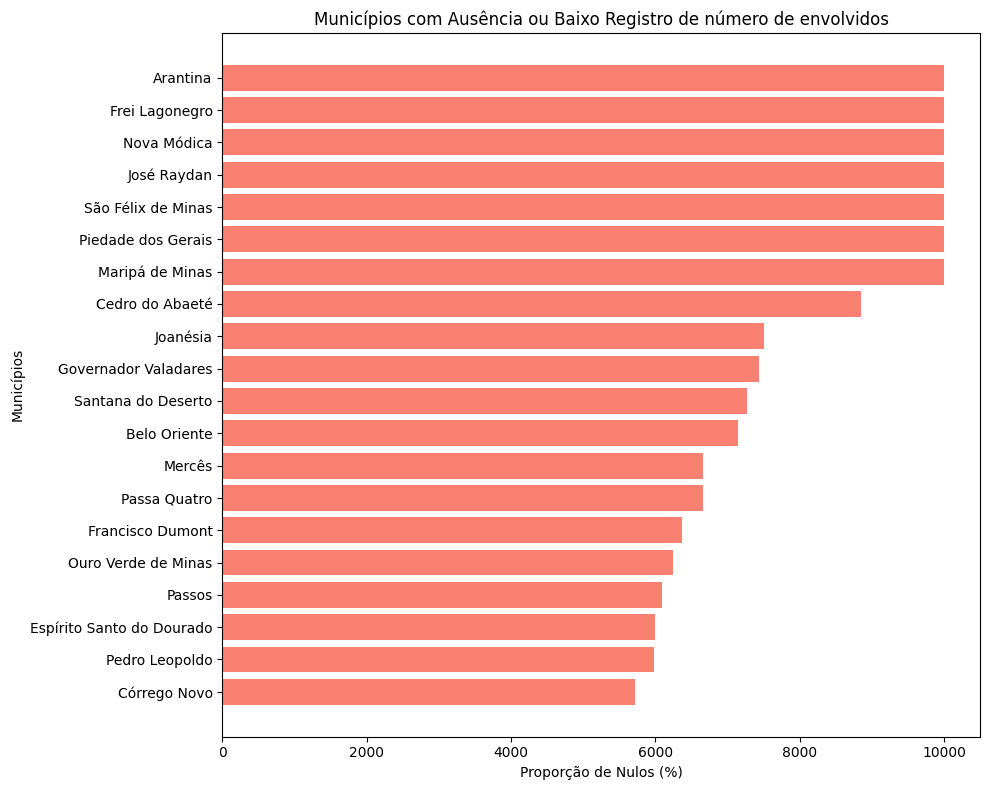

In [41]:
outliers_sorted_envolvidos = outliers_envolvidos.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(outliers_sorted_local.index, outliers_sorted_local.values * 100, color='salmon')
plt.xlabel('Proporção de Nulos (%)')
plt.ylabel('Municípios')
plt.title('Municípios com Ausência ou Baixo Registro de número de envolvidos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [42]:
df['NUM_ENVOLV'] = df['NUM_ENVOLV'].fillna('Não informado')

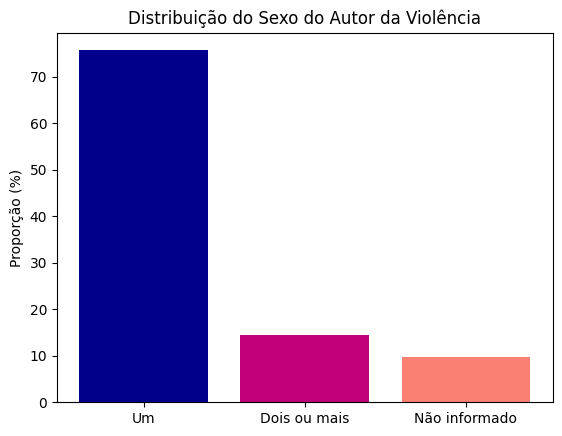

In [43]:
distribuicao = df['NUM_ENVOLV'].value_counts(normalize=True) * 100
plt.bar(distribuicao.index, distribuicao.values, color=['darkblue', '#C20078', 'salmon'])
plt.ylabel('Proporção (%)')
plt.title('Distribuição do Sexo do Autor da Violência')
plt.show()

In [44]:
df["OUT_VEZES"].isnull().mean()*100

np.float64(25.662726255153025)

In [45]:
df.groupby("ID_MN_RESI")["OUT_VEZES"].apply(lambda x: x.isnull().mean() * 100).sort_values(ascending=False)

ID_MN_RESI
Areado                100.0
Laranjal              100.0
Cachoeira Dourada     100.0
São Félix de Minas    100.0
Nova Módica           100.0
                      ...  
Augusto de Lima         0.0
Doresópolis             0.0
Dores do Indaiá         0.0
Dores de Guanhães       0.0
Aiuruoca                0.0
Name: OUT_VEZES, Length: 827, dtype: float64

In [46]:
proporcao_nulos_vezes = df.groupby('ID_MN_RESI')['OUT_VEZES'].apply(lambda x: x.isna().mean()) * 100
Q1 = proporcao_nulos_vezes.quantile(0.25)
Q3 = proporcao_nulos_vezes.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_vezes = proporcao_nulos_vezes[proporcao_nulos_vezes > limite_superior]
print(f"Número de outliers em OUT_VEZES: {len(outliers_local)}")
print(outliers_vezes.sort_values(ascending=False))

Número de outliers em OUT_VEZES: 89
ID_MN_RESI
Arantina                       100.000000
Areado                         100.000000
Cachoeira Dourada              100.000000
José Raydan                    100.000000
Fruta de Leite                 100.000000
Frei Lagonegro                 100.000000
Desterro do Melo               100.000000
Luminárias                     100.000000
Laranjal                       100.000000
Serranópolis de Minas          100.000000
Piedade dos Gerais             100.000000
Passa Tempo                    100.000000
Patis                          100.000000
Nova Módica                    100.000000
Maripá de Minas                100.000000
Água Boa                       100.000000
Santo Antônio do Rio Abaixo    100.000000
São Félix de Minas             100.000000
Rubelita                       100.000000
Cedro do Abaeté                 88.571429
Passa Quatro                    83.333333
Miraí                           82.857143
Santana do Deserto           

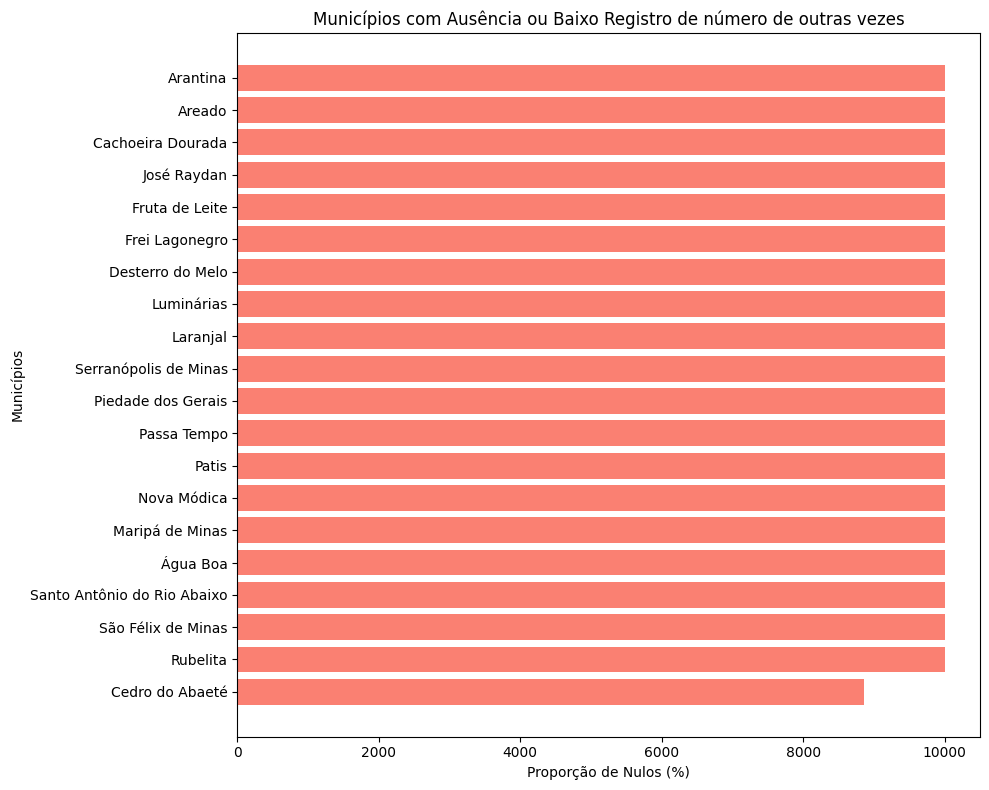

In [47]:
outliers_sorted_vezes = outliers_vezes.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(outliers_sorted_vezes.index, outliers_sorted_vezes.values * 100, color='salmon')
plt.xlabel('Proporção de Nulos (%)')
plt.ylabel('Municípios')
plt.title('Municípios com Ausência ou Baixo Registro de número de outras vezes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [48]:
df['OUT_VEZES'] = df['OUT_VEZES'].fillna('Não informado')

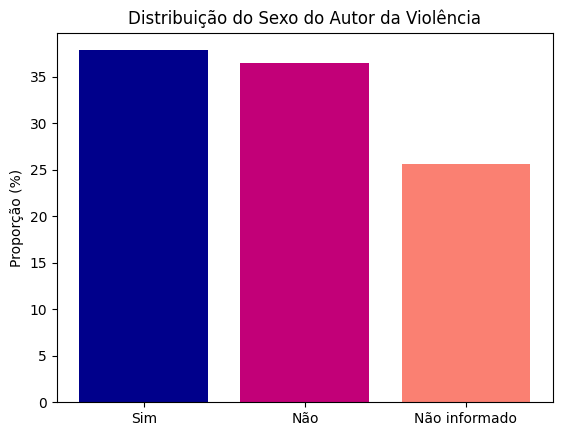

In [49]:
distribuicao = df['OUT_VEZES'].value_counts(normalize=True) * 100
plt.bar(distribuicao.index, distribuicao.values, color=['darkblue', '#C20078', 'salmon'])
plt.ylabel('Proporção (%)')
plt.title('Distribuição do Sexo do Autor da Violência')
plt.show()

In [50]:
df["CS_RACA"].isnull().mean()*100

np.float64(7.698817876545906)

In [51]:
df.groupby("ID_MN_RESI")["CS_RACA"].apply(lambda x: x.isnull().mean() * 100).sort_values(ascending=False)

ID_MN_RESI
Descoberto             100.000000
Piedade dos Gerais     100.000000
Cabeceira Grande       100.000000
Elói Mendes             75.000000
Itatiaiuçu              66.666667
                          ...    
Abaeté                   0.000000
Abadia dos Dourados      0.000000
Águas Vermelhas          0.000000
Vermelho Novo            0.000000
Veríssimo                0.000000
Name: CS_RACA, Length: 827, dtype: float64

In [52]:
proporcao_nulos_raca = df.groupby('ID_MN_RESI')['CS_RACA'].apply(lambda x: x.isna().mean()) * 100
Q1 = proporcao_nulos_raca.quantile(0.25)
Q3 = proporcao_nulos_raca.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_raca = proporcao_nulos_raca[proporcao_nulos_raca > limite_superior]
print(f"Número de outliers em CS_RACA: {len(outliers_raca)}")
print(outliers_raca.sort_values(ascending=False))

Número de outliers em CS_RACA: 163
ID_MN_RESI
Cabeceira Grande       100.000000
Piedade dos Gerais     100.000000
Descoberto             100.000000
Elói Mendes             75.000000
Itatiaiuçu              66.666667
                          ...    
Jenipapo de Minas        5.000000
São Gonçalo do Pará      5.000000
Varginha                 4.914530
Juiz de Fora             4.899777
São João Del Rei         4.878049
Name: CS_RACA, Length: 163, dtype: float64


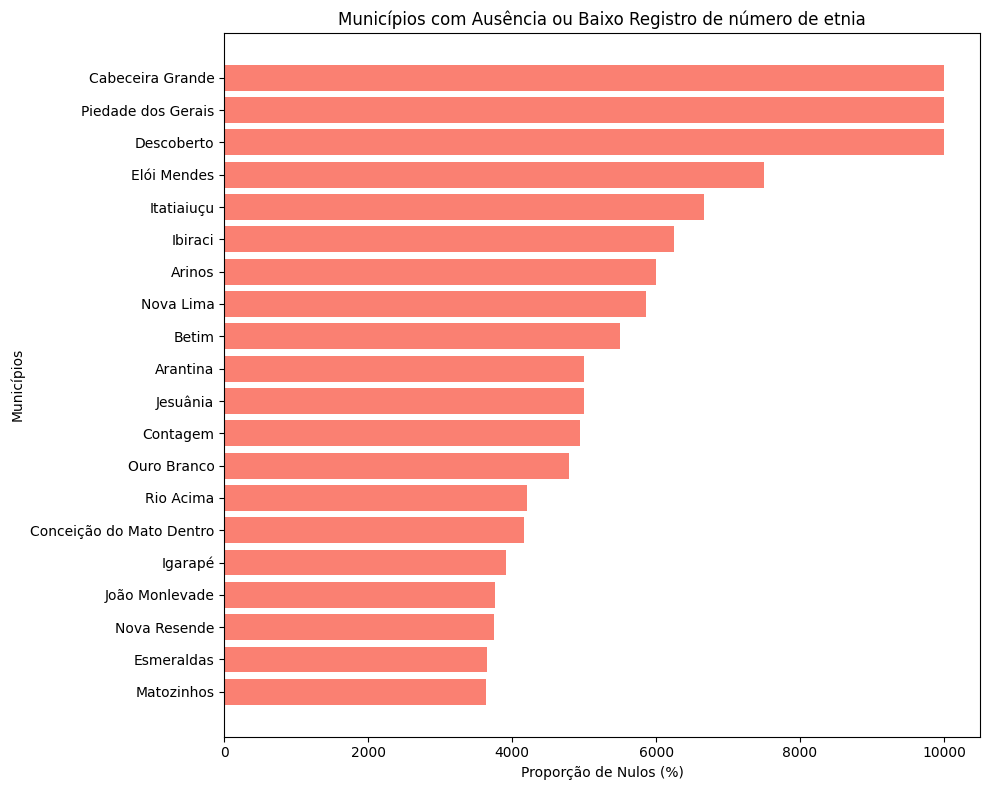

In [53]:
outliers_sorted_raca = outliers_raca.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(outliers_sorted_raca.index, outliers_sorted_raca.values * 100, color='salmon')
plt.xlabel('Proporção de Nulos (%)')
plt.ylabel('Municípios')
plt.title('Municípios com Ausência ou Baixo Registro de número de etnia')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [54]:
df['CS_RACA'] = df['CS_RACA'].fillna('Não informado')

In [55]:
print(df["CS_RACA"].unique())

['Branca' 'Parda' 'Preta' 'Não informado' 'Amarela' 'Indígena']


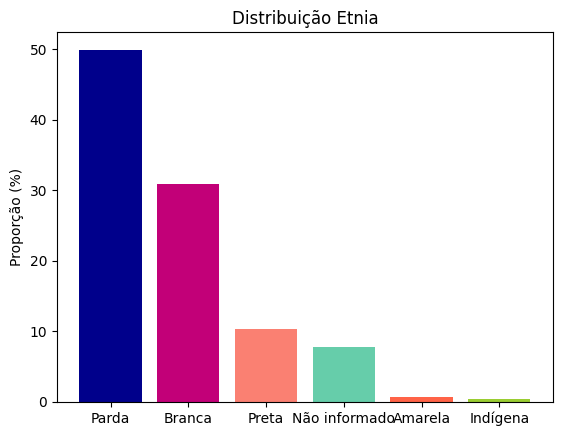

In [56]:
distribuicao = df['CS_RACA'].value_counts(normalize=True) * 100
plt.bar(distribuicao.index, distribuicao.values, color=['darkblue', '#C20078', 'salmon', 'mediumaquamarine', 'tomato', 'yellowgreen'])
plt.ylabel('Proporção (%)')
plt.title('Distribuição Etnia')
plt.show()

In [57]:
colunas_verificar = ["AUTOR_SEXO", "LOCAL_OCOR", "VIOL_FISIC", "VIOL_PSICO", "VIOL_SEXU", "CS_RACA", "OUT_VEZES"]
# Filtrar municípios que têm todas essas colunas nulas
municipios_sem_registro = df.groupby("ID_MN_RESI")[colunas_verificar].apply(lambda x: x.isnull().all().sum())

# Filtrar apenas municípios que não registraram nenhuma informação nessas colunas
municipios_sem_registro = municipios_sem_registro[municipios_sem_registro > 0]

# Exibir os municípios problemáticos
print("Municípios que não registraram nenhuma informação nessas colunas:")
print(municipios_sem_registro)

Municípios que não registraram nenhuma informação nessas colunas:
ID_MN_RESI
Arantina              1
Frei Lagonegro        1
José Raydan           1
Maripá de Minas       1
Nova Módica           1
Piedade dos Gerais    1
São Félix de Minas    1
dtype: int64


In [58]:
# Definir colunas onde "Não Informado" deve ser contado
colunas_verificar = ["AUTOR_SEXO", "LOCAL_OCOR", "VIOL_FISIC", "VIOL_PSICO", "VIOL_SEXU", "CS_RACA", "NUM_ENVOLV"]

# Contar a proporção de "Não Informado" por município
proporcao_nao_informado_municipio = df.groupby("ID_MN_RESI")[colunas_verificar].apply(lambda x: (x == "Não informado").mean())

# Criar uma nova coluna com a média de "Não Informado" por município
proporcao_nao_informado_municipio["MEDIA_NAO_INFORMADO"] = proporcao_nao_informado_municipio.mean(axis=1)

# Filtrar municípios que têm mais de 50% de "Não Informado"
municipios_criticos = proporcao_nao_informado_municipio[proporcao_nao_informado_municipio["MEDIA_NAO_INFORMADO"] > 0.5]

# Exibir os municípios problemáticos
print(municipios_criticos.head())

                 AUTOR_SEXO  LOCAL_OCOR  VIOL_FISIC  VIOL_PSICO  VIOL_SEXU  \
ID_MN_RESI                                                                   
Arantina           1.000000         0.0    1.000000    1.000000   1.000000   
Cedro do Abaeté    0.885714         0.0    0.885714    0.885714   0.885714   
José Raydan        1.000000         0.0    1.000000    1.000000   1.000000   
Maripá de Minas    1.000000         0.0    1.000000    1.000000   1.000000   
Mercês             1.000000         0.0    0.666667    0.666667   0.666667   

                 CS_RACA  NUM_ENVOLV  MEDIA_NAO_INFORMADO  
ID_MN_RESI                                                 
Arantina             0.5    1.000000             0.785714  
Cedro do Abaeté      0.0    0.885714             0.632653  
José Raydan          0.0    1.000000             0.714286  
Maripá de Minas      0.0    1.000000             0.714286  
Mercês               0.0    1.000000             0.571429  


C:\Users\User\AppData\Local\Temp\ipykernel_8804\1342250627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=municipios_criticos["MEDIA_NAO_INFORMADO"].values, y=municipios_criticos.index, palette="Reds_r")


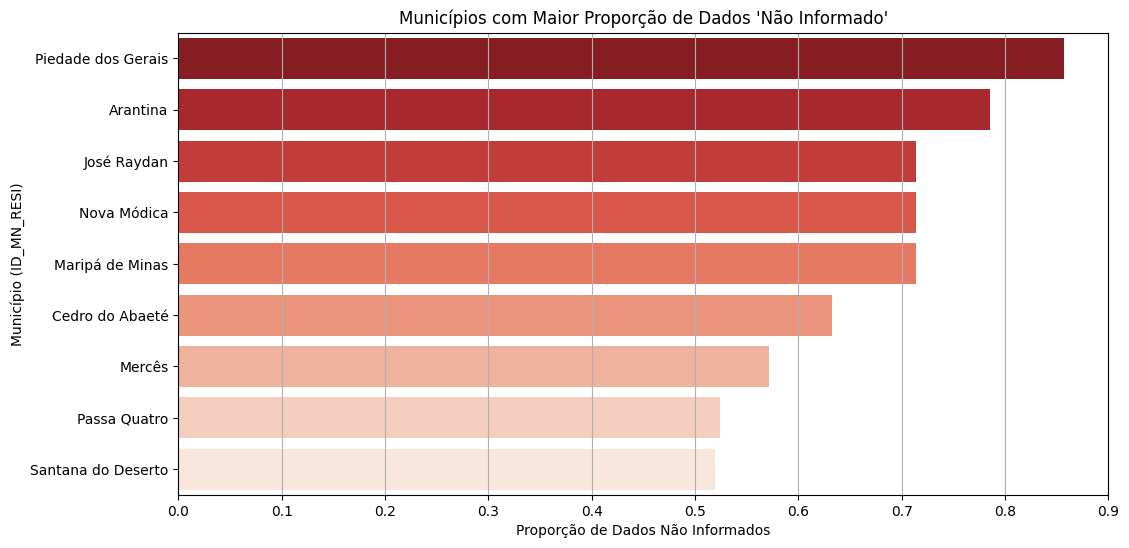

In [59]:
# Ordenar os piores municípios
municipios_criticos = municipios_criticos.sort_values(by="MEDIA_NAO_INFORMADO", ascending=False)

# Criar o gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=municipios_criticos["MEDIA_NAO_INFORMADO"].values, y=municipios_criticos.index, palette="Reds_r")

plt.title("Municípios com Maior Proporção de Dados 'Não Informado'")
plt.xlabel("Proporção de Dados Não Informados")
plt.ylabel("Município (ID_MN_RESI)")
plt.grid(axis="x")
plt.show()

In [60]:
# Padronização nas colunas categóricas
colunas_categoricas = ["AUTOR_SEXO", "VIOL_FISIC", "VIOL_PSICO", "VIOL_SEXU"]

for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype(str).str.strip().str.lower()

In [61]:
# Dicionário de mapeamento para os valores
mapeamento = {"sim": 1, "não": 0, "não informado": -1}

# Aplicar mapeamento apenas nas colunas necessárias
df["AUTOR_SEXO"] = df["AUTOR_SEXO"].map({"masculino": 1, "feminino": 0, "não informado": -1})
df["VIOL_FISIC"] = df["VIOL_FISIC"].map(mapeamento)
df["VIOL_PSICO"] = df["VIOL_PSICO"].map(mapeamento)
df["VIOL_SEXU"] = df["VIOL_SEXU"].map(mapeamento)

In [62]:
print(df[["AUTOR_SEXO", "VIOL_FISIC", "VIOL_PSICO", "VIOL_SEXU"]].head())

   AUTOR_SEXO  VIOL_FISIC  VIOL_PSICO  VIOL_SEXU
0         0.0           1           0          0
1         1.0           1           0          0
2         0.0           1           0          0
3         1.0           1           1          0
4         1.0           1           0          0


In [65]:
df.to_csv("dados_tratados.csv", index=False, encoding="utf-8")